# Text Mining Radiology Reports

The task was to iterate through a zipped directory of multi-modal text files (including further zipped directories) containing synthetically generated radiology reports (CSV, Pickle and JSON) for patients with heart failure and extract the RV/LV ratios for each report which appear after a keyword. Once extracted the ratios were to be compiled and a mean ratio for all the reports was to be calculated and a histogram plotted.

Solutions:

The mean RV/LV ratio, calculated from 83222 reports is 1.201


## Main Extraction Function

In [1]:
# Import statements

import glob
import os
import re
import tarfile
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
def main_extract(path):

    results_list = []

    os.chdir(path)

    filetypes = ["*.csv", "*.pkl", "*.tar.gz"]

    for item in filetypes:
        if item == "*.csv":
            for file in glob.glob("*.csv"): 
                with open(file, "r") as f:
                    text = f.read()
                    result = re.findall(r"((?i)ratio|(?i)rv\/lv|(?i)lv\/rv|(?i)lv:rv).*?(\d+(?:,\d+)*(?:\.\d+)?)", text)
                    results_list.append(result)

        elif item == "*.pkl":
            for file in glob.glob("*.pkl"):
                with open(file, 'rb') as openfile:
                    text = pickle.load(openfile)
                    for item in text:
                        result = re.findall(r"((?i)ratio|(?i)rv\/lv|(?i)lv\/rv|(?i)lv:rv).*?(\d+(?:,\d+)*(?:\.\d+)?)", str(item))
                        results_list.append(result)

        elif item == "*.tar.gz":
            for file in glob.glob("*.tar.gz"):
                tar = tarfile.open(file, "r:gz")
                for file2 in tar.getmembers():
                    f = tar.extractfile(file2)
                    contents = str(f.read())
                    result = re.findall(r"((?i)ratio|(?i)rv\/lv|(?i)lv\/rv|(?i)lv:rv).*?(\d+(?:,\d+)*(?:\.\d+)?)", contents)
                    results_list.append(result)
                    
    return results_list

## Compile Master List, Plot mean and Histogram

This simply takes the data from the 'results_list' object, and extracts only the value from the tuple. It casts it to a string and compiles another list of float values for calculation. It also saves a figure to your working directory. 

In [3]:
def calculate_and_plot(results):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    master_list = []

    for ratio in results:
        for subs in ratio:
            r,v = subs
            master_list.append(float(v))
            
    mean = round(sum(master_list)/len(master_list), 3)
    
    print("The mean RV/LV ratio, calculated from {} reports is {}:".format(len(master_list), mean))
    
    plt.figure(figsize=(10,7))
    plt.hist(master_list, bins = 15)
    plt.axvline(mean, linewidth=4, color='green', label='Mean')
    plt.legend(fontsize=15)
    plt.xlabel("RV/LV Ratio", fontsize=15)
    plt.ylabel("Count", fontsize=15)
    plt.title("Histogram of RV/LV Distributions", fontsize=20)
    plt.savefig("figure1")
        
    plt.show()

    return

### Call Functions

The mean RV/LV ratio, calculated from 83222 reports is 1.201:


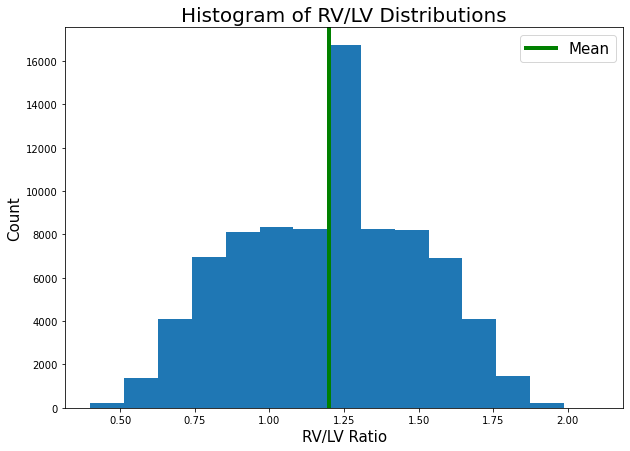

In [4]:
calculate_and_plot(main_extract("text_mining_radiology_reports/data"))